In [2]:
import pandas as pd 
from pandas import DataFrame as df 
import numpy as np 
import scipy.stats as st 
import datetime as dt 
import matplotlib.pyplot as plt 
%matplotlib inline 
import copy

In [3]:
def logRet(df):
    pri = df
    daily_returns = pri * 0
    for i in range(1, len(pri)-1):
        daily_returns[i] = np.log(pri[i]/pri[i-1])
    return daily_returns

# For a portfolio's returns, gives the index
def indx(ret):
    ret = ret.reset_index(drop=True)
    ind = ret * 0 + 100
    for i in range(1, len(ret)-1):
        ind[i] = ind[i-1] * (1+ret[i])
    return ind

# Cumulative returns

def cumRet(rets):
    cumR = rets * 0 
    for t in range(1, len(cumR)-1):
        cumR[t] = cumR[t-1] + rets[t]
    return cumR

# Risk metric functions

def maxDrawdown(pri, window=252):
    Roll_Max = pri.rolling(window, min_periods=200).max()
    Daily_Drawdown = pri/Roll_Max - 1.0
    Daily_Drawdown *= -1
    Max_Daily_Drawdown = np.max(Daily_Drawdown)
    # print("Max daily drawdown: {}%".format(round(Max_Daily_Drawdown, 2)))
    return Max_Daily_Drawdown

def plotDrawdown(pri, window=252):
    Roll_Max = pri.rolling(window, min_periods=200).max()
    Daily_Drawdown = pri/Roll_Max - 1.0
    Daily_Drawdown *= -1
    fig = plt.figure()
    ax = fig.add_axes([1,1,1,1])
    ax.plot(Daily_Drawdown)
    ax.set_xlabel('Year')
    ax.set_ylabel('%')
    ax.set_title('Drawdown')
    plt.show()

def valueAR(dailyRet, per=5): #Historical
    pci = np.percentile(dailyRet, per)
    # print("VaR at {0}%: {1}%".format(per, round(-100*pci, 3)))
    return -pci

def cVaR(dailyRet, per=5):
    pci = np.percentile(dailyRet, per)
    sumBad = 0
    t = 0
    for ret in dailyRet:
        if ret <= pci:
            t += 1
            sumBad += ret
    if t > 0:
        condVaR = sumBad / t
    else:
        condVaR = 0
    # print("CVaR at {0}%: {1}%".format(per, round(-100*condVaR, 3)))
    return -condVaR

def semiv(dayRet, port=False):
    m = np.mean(dayRet)
    low = []
    for ret in dayRet:
        if ret <= m:
            low.append(ret)
    stand = np.std(low)
    if port: 
        stand *= np.sqrt(21)
    # print("SemiSD: {}".format(round(stand, 6)))
    return stand

# Use pricing data
def max_drawdown(X):
    mdd = 0
    peak = X[0]
    for x in X:
        if x > peak:
            peak = x
        else:
            dd = (peak - x) / peak
            if dd > mdd:
                mdd = dd
    return mdd

# Adjusted to use returns data 
def maxDDRet(rets):
    return max_drawdown(indx(rets))

# SD, SemiV, Drawdown, VaR, CVaR, Skewness, Kurtosis
def riskMetrics(ret, name = "portfolio", varP = 5, cvarP = 5):
    print("Risk metrics for {}".format(name))
    pri = indx(ret)
    print("Average return: {}%".format(round(100*np.mean(ret), 6)))
    sd = np.std(ret)
    print("SD: {}".format(round(sd, 6)))
    semiv(ret)
    dd = max_drawdown(pri)
    print("Max DD: {}%".format(round(100*dd, 2)))
    valueAR(ret, varP)
    cVAR(ret, cvarP)
    sk = st.skew(ret)
    print("Skewness: {}".format(round(sk, 6)))
    kurt = st.kurtosis(ret)
    print("Kurtosis: {}".format(round(kurt+3, 6)))
    print("Excess Kurtosis: {}".format(round(kurt, 6)))
    print("")
    
def cVaRNP(dailyRet, per=5):
    pci = np.percentile(dailyRet, per)
    sumBad = 0
    t = 0
    for ret in dailyRet:
        if ret <= pci:
            t += 1
            sumBad += ret
    if t > 0:
        condVaR = sumBad / t
    else:
        condVaR = 0
    # print("CVaR at {0}%: {1}%".format(per, np.round(float(-100*condVaR), 3)))
    return -condVaR

def riskMetricsNP(ret, name = "portfolio", varP = 5, cvarP = 5, port=False):
    print("Risk metrics for {}".format(name))
    pri = indx(ret)
    print("Average return: {}%".format(round(100*np.mean(ret), 6)))
    sd = np.std(ret)
    # Note change for monthly to work for portfolio 
    if port: 
        print("SD: {}".format(np.round(sd*np.sqrt(21), 6)))
    else: 
        print("SD: {}".format(np.round(sd, 6)))
    semiv(ret, port=True)
    dd = max_drawdown(pri)
    print("Max DD: {}%".format(np.round(float(100*dd), 2)))
    valueAR(ret, varP)
    cVaRNP(ret, cvarP)
    sk = st.skew(ret)
    print("Skewness: {}".format(np.round(float(sk), 6)))
    kurt = st.kurtosis(ret)
    print("Kurtosis: {}".format(round(kurt+3, 6)))
    print("Excess Kurtosis: {}".format(np.round(float(kurt), 6)))
    print("")

In [4]:
import numpy as np 
import pandas as pd 
import scipy.stats as st 
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix
import random
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [4]:
X = smry.drop(['PERMNO', 'year', 'nmean', 'nvariance', 'nskew', 'nkurtosis'],axis=1).values
y = smry[['nmean', 'nvariance', 'nskew', 'nkurtosis']].values

NameError: name 'smry' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# X_train = scaler.fit_transform(np.log(scaler.fit_transform(X_train) + 1))
X_test = scaler.transform(X_test)
# X_test = scaler.fit_transform(np.log(scaler.fit_transform(X_test) + 1))

In [ ]:
# 2 hidden layers 
model = Sequential()

model.add(Dense(20,activation='relu'))

for i in range(3):
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.25))

model.add(Dense(4))

model.compile(optimizer='adam',loss='mse')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [ ]:
model.fit(x=X_train, 
         y=y_train, 
         epochs=150, 
          batch_size=256, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
         )

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
pred = model.predict(X_test)
pred

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test[:,0], pred[:,0])
plt.scatter(y_test[:,0], y_test[:,0], color='r')

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test[:,1], pred[:,1])
plt.scatter(y_test[:,1], y_test[:,1], color='r')

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test[:,2], pred[:,2])
plt.scatter(y_test[:,2], y_test[:,2], color='r')

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test[:,3], pred[:,3])
plt.scatter(y_test[:,3], y_test[:,3], color='r')

In [5]:
rets = pd.read_csv('rets.csv').set_index('date')
rets

,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.014706,0.040822,-0.144250,-0.089856,-0.086433,0.031351,0.000000,-0.088107,-0.064539,-0.027098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.014706,-0.040822,0.072722,0.089856,0.034133,-0.050644,-0.022990,0.057524,0.064539,-0.000743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,-0.007326,0.020619,-0.047188,-0.064539,-0.044604,0.000000,-0.028836,0.003101,-0.021053,0.001485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,-0.007380,0.059423,0.024898,0.008299,0.010471,-0.095310,0.071826,0.003091,-0.032435,0.007391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,0.000000,-0.019418,-0.050431,0.000000,0.003466,-0.014389,-0.009950,-0.034540,0.032435,0.024729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000000,0.020340,0.000000,-0.117783,0.006181,0.000000,-0.000455,-0.003764,0.000000,0.001933,...,0.005882,0.0,0.005648,-0.422272,0.004152,-0.019293,-0.143101,-0.013668,0.072149,0.014281
2019-12-26,0.000000,0.020340,0.000000,-0.117783,0.006181,0.000000,-0.000455,0.003066,-0.002882,-0.002579,...,0.009371,0.0,0.000672,-0.422272,0.004152,-0.019293,-0.143101,-0.037388,0.072149,0.013292
2019-12-27,0.000000,0.020340,0.000000,-0.117783,0.006181,0.000000,-0.000455,0.002414,-0.013950,-0.006736,...,-0.012772,0.0,-0.001766,-0.422272,0.004152,-0.019293,-0.143101,-0.058841,0.072149,-0.001300


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

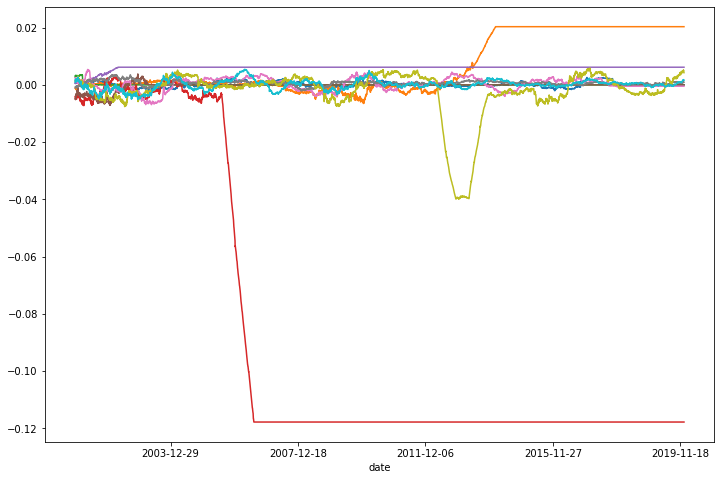

In [6]:
rets.iloc[:,:10].fillna(0).rolling(252).mean().plot(legend=None, figsize=(12,8))

In [7]:
rollMean = rets.fillna(0).rolling(252).mean().iloc[251:,:]
rollVar = rets.fillna(0).rolling(252).var().iloc[251:,:]
rollSkew = rets.fillna(0).rolling(252).skew().iloc[251:,:]
rollKurt = (rets.fillna(0).rolling(252).kurt() + 3).iloc[251:,:]

Epoch 1/150
15/15 [==============================] - 1s 51ms/step - loss: 0.0106 - val_loss: 0.0093
Epoch 2/150
15/15 [==============================] - 0s 23ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 3/150
15/15 [==============================] - 0s 23ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 4/150
15/15 [==============================] - 0s 25ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 5/150
15/15 [==============================] - 0s 26ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/150
15/15 [==============================] - 0s 25ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 7/150
15/15 [==============================] - 0s 23ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 8/150
15/15 [==============================] - 0s 25ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 9/150
15/15 [==============================] - 0s 22ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 10/150
15/15 [==============================] - 0s 23ms/step - loss: 0.0093 - val_loss: 0.0092

<AxesSubplot:>

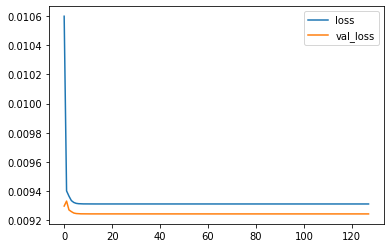

In [8]:
X = rollMean.iloc[:,:-int(0.2*rollMean.shape[1])].fillna(0).values
X = X.reshape(X.shape[0], 1, X.shape[1])
y = rollMean.iloc[:,-int(0.2*rollMean.shape[1])+1:].fillna(0).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(1, X.shape[2])))
#model.add(LSTM(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model.fit(x=X_train, 
         y=y_train, 
         epochs=150, 
          batch_size=256, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
            )

losses = pd.DataFrame(model.history.history)
losses.plot()

Epoch 1/150
15/15 [==============================] - 1s 43ms/step - loss: 1.0937e-04 - val_loss: 1.4905e-04
Epoch 2/150
15/15 [==============================] - 0s 29ms/step - loss: 1.0892e-04 - val_loss: 1.4896e-04
Epoch 3/150
15/15 [==============================] - 0s 23ms/step - loss: 1.0887e-04 - val_loss: 1.4894e-04
Epoch 4/150
15/15 [==============================] - 0s 23ms/step - loss: 1.0886e-04 - val_loss: 1.4893e-04
Epoch 5/150
15/15 [==============================] - 0s 23ms/step - loss: 1.0885e-04 - val_loss: 1.4893e-04
Epoch 6/150
15/15 [==============================] - 0s 24ms/step - loss: 1.0885e-04 - val_loss: 1.4893e-04
Epoch 7/150
15/15 [==============================] - 0s 28ms/step - loss: 1.0885e-04 - val_loss: 1.4893e-04
Epoch 8/150
15/15 [==============================] - 0s 23ms/step - loss: 1.0885e-04 - val_loss: 1.4893e-04
Epoch 9/150
15/15 [==============================] - 0s 22ms/step - loss: 1.0885e-04 - val_loss: 1.4893e-04
Epoch 10/150
15/15 [========

<AxesSubplot:>

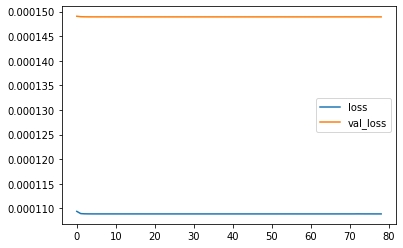

In [9]:
X = rollVar.iloc[:,:-int(0.2*rollVar.shape[1])].fillna(0).values
X = X.reshape(X.shape[0], 1, X.shape[1])
y = rollVar.iloc[:,-int(0.2*rollVar.shape[1])+1:].fillna(0).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(1, X.shape[2])))
#model.add(LSTM(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model.fit(x=X_train, 
         y=y_train, 
         epochs=150, 
          batch_size=256, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
            )

losses = pd.DataFrame(model.history.history)
losses.plot()

Epoch 1/150
15/15 [==============================] - 1s 45ms/step - loss: 314708721664.0000 - val_loss: 305209769984.0000
Epoch 2/150
15/15 [==============================] - 0s 26ms/step - loss: 312744574976.0000 - val_loss: 304903487488.0000
Epoch 3/150
15/15 [==============================] - 0s 26ms/step - loss: 312460247040.0000 - val_loss: 304697376768.0000
Epoch 4/150
15/15 [==============================] - 0s 25ms/step - loss: 312334024704.0000 - val_loss: 304632692736.0000
Epoch 5/150
15/15 [==============================] - 0s 24ms/step - loss: 312310071296.0000 - val_loss: 304631611392.0000
Epoch 6/150
15/15 [==============================] - 0s 24ms/step - loss: 312308989952.0000 - val_loss: 304628301824.0000
Epoch 7/150
15/15 [==============================] - 0s 23ms/step - loss: 312308137984.0000 - val_loss: 304629022720.0000
Epoch 8/150
15/15 [==============================] - 0s 23ms/step - loss: 312307515392.0000 - val_loss: 304628432896.0000
Epoch 9/150
15/15 [=====

<AxesSubplot:>

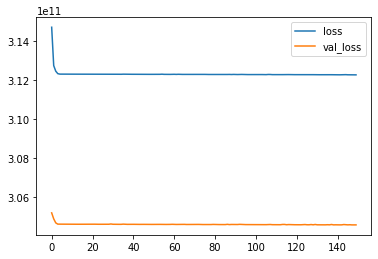

In [10]:
X = rollSkew.iloc[:,:-int(0.2*rollSkew.shape[1])].fillna(0).values
X = X.reshape(X.shape[0], 1, X.shape[1])
y = rollSkew.iloc[:,-int(0.2*rollSkew.shape[1])+1:].fillna(0).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(1, X.shape[2])))
#model.add(LSTM(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model.fit(x=X_train, 
         y=y_train, 
         epochs=150, 
          batch_size=256, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
            )

losses = pd.DataFrame(model.history.history)
losses.plot()

Epoch 1/150
15/15 [==============================] - 1s 47ms/step - loss: nan - val_loss: nan
Epoch 2/150
15/15 [==============================] - 0s 30ms/step - loss: nan - val_loss: nan
Epoch 3/150
15/15 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 4/150
15/15 [==============================] - 0s 27ms/step - loss: nan - val_loss: nan
Epoch 5/150
15/15 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 6/150
15/15 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 7/150
15/15 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 8/150
15/15 [==============================] - 0s 22ms/step - loss: nan - val_loss: nan
Epoch 9/150
15/15 [==============================] - 0s 22ms/step - loss: nan - val_loss: nan
Epoch 10/150
15/15 [==============================] - 0s 22ms/step - loss: nan - val_loss: nan
Epoch 11/150
15/15 [==============================] - 0s 24

<AxesSubplot:>

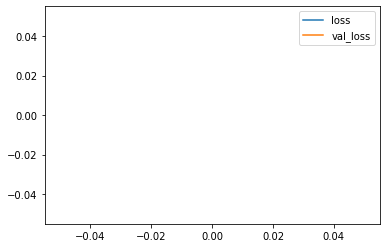

In [11]:
X = rollKurt.iloc[:,:-int(0.2*rollKurt.shape[1])].fillna(3).values
X = X.reshape(X.shape[0], 1, X.shape[1])
y = rollKurt.iloc[:,-int(0.2*rollKurt.shape[1])+1:].fillna(3).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(1, X.shape[2])))
#model.add(LSTM(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model.fit(x=X_train, 
         y=y_train, 
         epochs=150, 
          batch_size=256, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
            )

losses = pd.DataFrame(model.history.history)
losses.plot()

In [12]:
X.shape[2]

14697

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


((4779, 18371), <AxesSubplot:>)

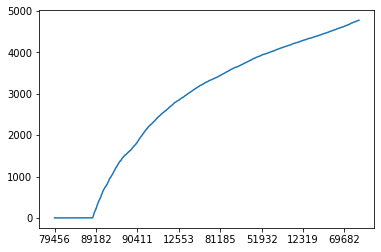

In [13]:
rollKurt.shape, rollKurt.isna().sum().sort_values().plot()